In [1]:
#Importing the Libraries
import pandas as pd
from pandas import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

C:\Users\TNBAUTISTA\AppData\Local\Temp\ipykernel_13296\591871176.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#Get the Dataset
df=pd.read_csv("NewData/BAC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,20.247801,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,20.625254,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,20.382603,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,20.382603,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,20.265772,75901500


In [3]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1354, 6)
Null Value Present:  False


<AxesSubplot:xlabel='Date'>

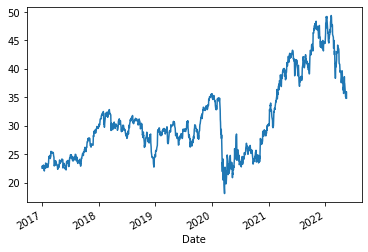

In [5]:
#Plot the True Adj Close Value
df["Close"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df["Close"])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


In [7]:
# Scale the data using MinMax
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2017-01-03,0.108972,0.098883,0.136744,0.347898
2017-01-04,0.112887,0.108081,0.149614,0.256652
2017-01-05,0.116150,0.107096,0.141570,0.297147
2017-01-06,0.114845,0.104468,0.148327,0.213543
2017-01-09,0.106036,0.099869,0.143179,0.252690


In [10]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [12]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model

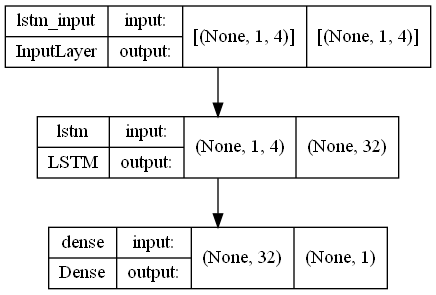

In [13]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [14]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 885.0109
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 719.3187
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 411.1139
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 138.1705
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 32.7364
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 14.7099
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 11.8672
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 10.6491
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 9.6864
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 8.8272
Epoch 11/100
154/154 [==============================] - 0s 1ms/step - loss: 8.0530
Epoch 12/100
154/154 [==============================] - 0s 1ms/step - loss: 7.3546
E

In [15]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[46.52803 ],
       [47.18811 ],
       [47.66918 ],
       [45.527267],
       [46.116524],
       [44.837025],
       [44.925438],
       [44.804848],
       [44.50324 ],
       [44.627876],
       [44.8714  ],
       [44.66288 ],
       [44.376892],
       [44.720867],
       [44.190483],
       [44.271786],
       [44.24092 ],
       [44.7986  ],
       [44.06582 ],
       [43.27174 ],
       [44.13621 ],
       [44.452095],
       [44.963875],
       [44.81022 ],
       [44.949265],
       [45.129105],
       [45.05915 ],
       [44.790077],
       [45.71391 ],
       [47.54534 ],
       [47.820637],
       [47.758102],
       [48.547783],
       [49.177643],
       [48.99051 ],
       [49.07878 ],
       [49.036232],
       [47.61239 ],
       [47.097717],
       [47.460724],
       [46.517204],
       [45.41775 ],
       [43.686085],
       [44.685112],
       [45.906174],
       [46.03485 ],
       [45.329533],
       [45.859623],
       [46.590427],
       [46.78443 ],


In [19]:
BAC_Prediction = pd.DataFrame(y_pred)
BAC_Prediction

,0
0,46.528030
1,47.188110
2,47.669182
3,45.527267
4,46.116524
...,...
118,35.173264
119,35.619499
120,35.172646
121,36.133553


In [20]:
# write BAC Prediction list to csv
BAC_Prediction.to_csv("Outputs/BAC_Prediction.csv", index=False)

In [25]:
from jupyterthemes import jtplot

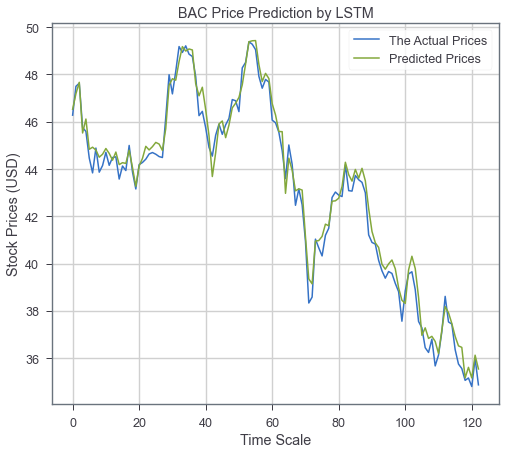

In [27]:
#Predicted vs True Adj Close Value – LSTM
jtplot.style(theme='grade3',context='notebook',ticks=True,grid=True)
plt.plot(y_test, label='The Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title("BAC Price Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Stock Prices (USD)')
plt.legend()
plt.show()
#plt.savefig("BAC_LSTM_graph")



In [28]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
import requests
import keras
from keras.models import load_model
from sklearn import preprocessing
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [29]:
def denormalize(df, normalized_value):
    df = df['Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)

    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new
p = lstm.predict(X_test)
newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [30]:
# use F score to measure the model

def model_F_score(newp,newy_test):
    TP=0
    FN=0
    FP=0
    for i in range(len(newp)-1):
        test_prof=newy_test[i+1]-newy_test[i]
        p_prof=newp[i+1] - newp[i]

        if((test_prof>=0) and (p_prof>=0)):
            TP=TP+1
        if ((test_prof>= 0) and (p_prof<0)):
            FN=FN+1
        if ((test_prof<0) and (p_prof>=0)):
            FP=FP+1

    Precision=float(TP)/float(TP+FP)
    Recall=float(TP)/float(TP+FN)

    Fscore= 2.0*Precision*Recall/(Precision+Recall)
    print('classification F score: %.5f' % (Fscore))
    return Fscore
    
testScore = math.sqrt(mean_squared_error(newp, newy_test))
print('Test Score: %.2f RMSE' % (testScore))

F_score=model_F_score(newp,newy_test)
print ('F_score',F_score)

Test Score: 15.55 RMSE
classification F score: 0.73585
F_score 0.7358490566037734
